# Atelier 1 « Régression »

## Partie 1 (Data Visualisation):

### 1 & 2. En utilisant pandas essayer d’explorer les données des deux Data sets. Afficher le résumer statistique des deux Data Sets avec une interprétation des résultatsobtenues.

In [3]:
import pandas as pd

df1 = pd.read_csv(r'C:\Users\imk\Desktop\LSI\Maching learning\data sets\Salary_Data.csv')
df3 = pd.read_csv(r'C:\Users\imk\Desktop\LSI\Maching learning\data sets\insurance.csv')

print("df1 : years & salary dataset")
print("Aperçu des premières lignes :")
print(df1.head(), "\n")

print("Informations générales :")
print(df1.info(), "\n")

print(f"Nombre de lignes et colonnes : {df1.shape}")
print(f"Noms des colonnes : {df1.columns.tolist()}")
print("données statistiques ")
print(df1.describe())

print("=== Validation de la propreté du dataset ===")
df1 = df1.drop_duplicates()
# Vérification des doublons
nb_duplicats = df1.duplicated().sum()
print(f"Nombre de lignes dupliquées : {df1.duplicated().sum()}")

# Vérification des valeurs manquantes
print(f"\nValeurs manquantes par colonne :{df1.isnull().sum()}")

print("==================================================================================================\n")

print("df3 : assurance dataset")
print("Aperçu des premières lignes :")
print(df3.head(), "\n")

print("Informations générales :")
print(df3.info(), "\n")

print(f"Nombre de lignes et colonnes : {df3.shape}")
print(f"Noms des colonnes : {df3.columns.tolist()}")
print("données statistiques :")
print(df3.describe())
df3 = df3.drop_duplicates()
print("Validation de la propreté du dataset")
df3 = df3.drop_duplicates()
print(df3.duplicated().sum())
print(df3.isnull().sum())

df1 : years & salary dataset
Aperçu des premières lignes :
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0 

Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None 

Nombre de lignes et colonnes : (30, 2)
Noms des colonnes : ['YearsExperience', 'Salary']
données statistiques 
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.

### interprétation des résultats obtenues.

**Veuillez consulter le rapport de l’atelier…**

### 3. Afficher la nuage des points du premier data set « Expérience / Salaire » en utilisant matplotlib et pandas , faire une conclusion.

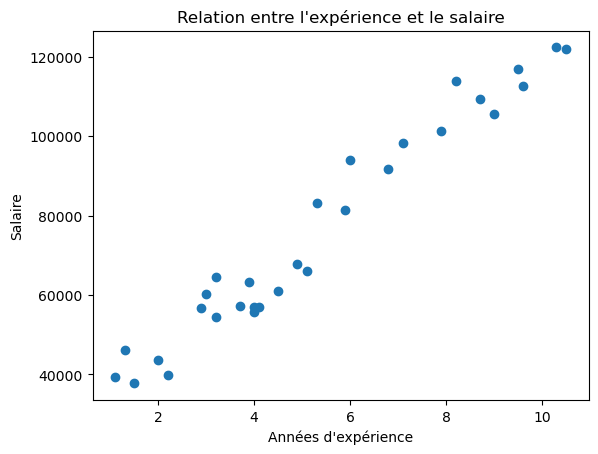

In [28]:
import matplotlib.pyplot as plt

# 2. Tracer le nuage de points
plt.scatter(df1["YearsExperience"], df1["Salary"])

# 3. Ajouter des titres pour comprendre le graphe
plt.xlabel("Années d'expérience")
plt.ylabel("Salaire")
plt.title("Relation entre l'expérience et le salaire")

# 4. Afficher le graphe
plt.show()

### 4. Afficher les nuages des points du deuxième data set selon les propriétés « Features » en utilisant matplotlib et pandas « scatter_matrix ».

<Figure size 1200x1200 with 0 Axes>

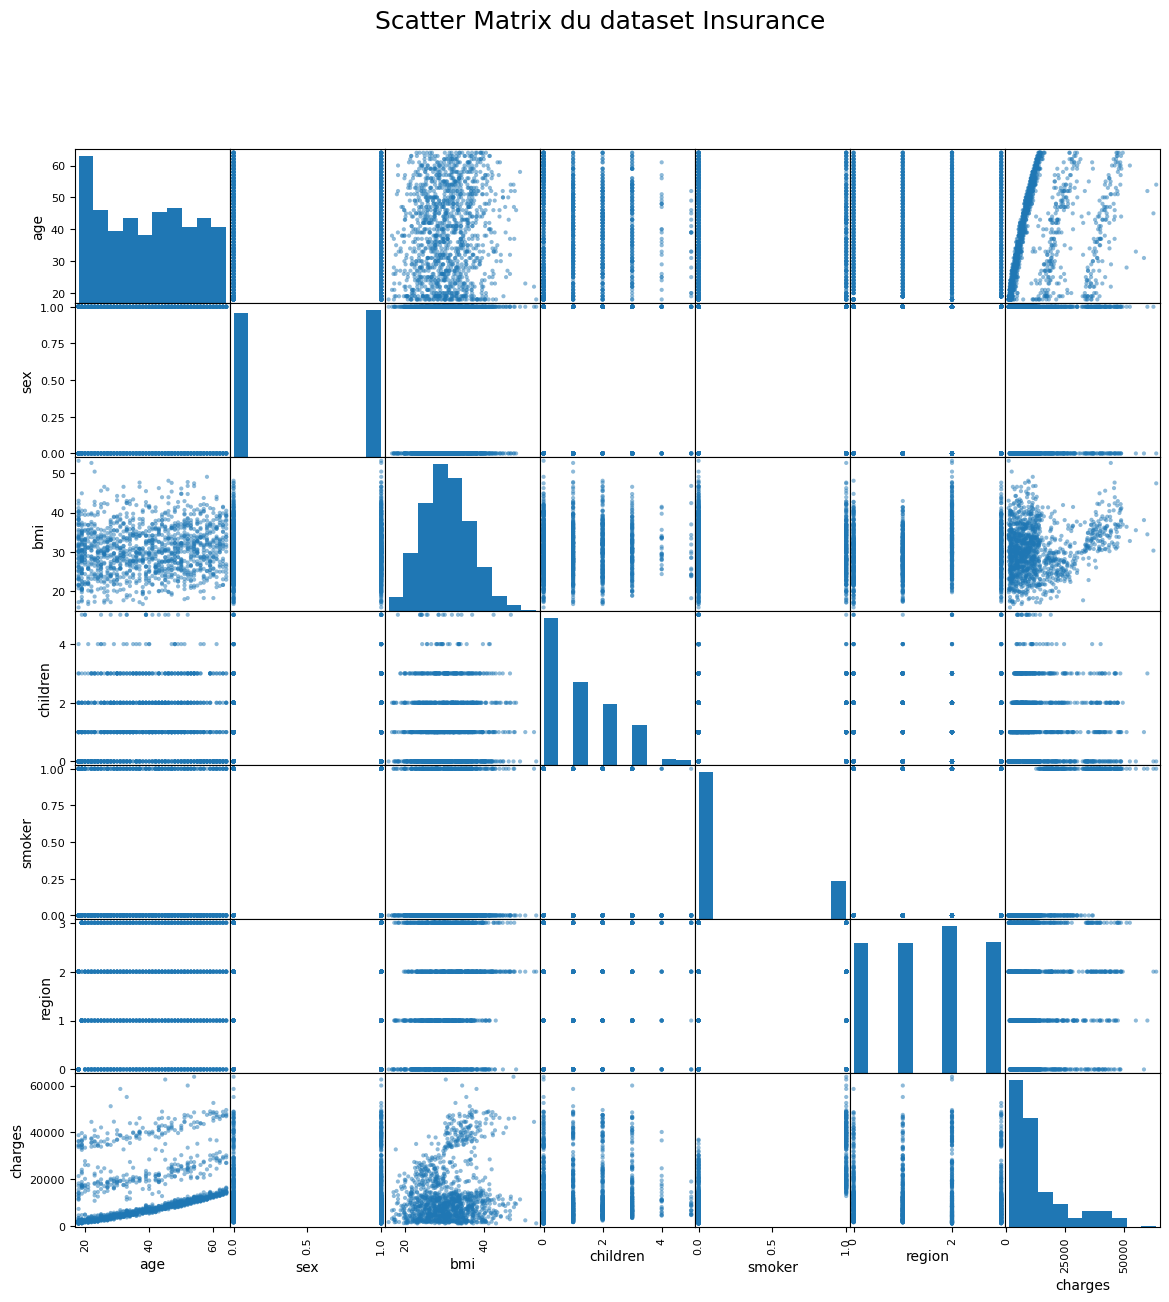

In [29]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

# Encodage des variables catégorielles
encoder = LabelEncoder()
df3['sex'] = encoder.fit_transform(df3['sex'])
df3['smoker'] = encoder.fit_transform(df3['smoker'])
df3['region'] = encoder.fit_transform(df3['region'])

# 2. Afficher la matrice de scatter plots
df3['sex'] = df3['sex'].astype(int)
df3['smoker'] = df3['smoker'].astype(int)
df3['region'] = df3['region'].astype(int)

# Affichage de la scatter matrix
plt.figure(figsize=(12, 12))
scatter_matrix(df3, figsize=(14, 14), diagonal='hist')
plt.suptitle("Scatter Matrix du dataset Insurance", fontsize=18)
plt.show()

## Partie 2 « Régression Simple cas Expérience Salaire »:

### 1. en utilisant l’API sklearn entraîner le modèle par intermédiaire de algorithme de la régression linière.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X1 = df1['YearsExperience'].values.reshape(-1, 1)
y1 = df1['Salary'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1= LinearRegression()

model1.fit(X1_train, y1_train)

LinearRegression()

### 2. prédire les données d’un data set de test.

In [31]:
y1_pred = model1.predict(X1_test)

### 3. Visualiser le résultat de la régression sous forme d’un graphe.

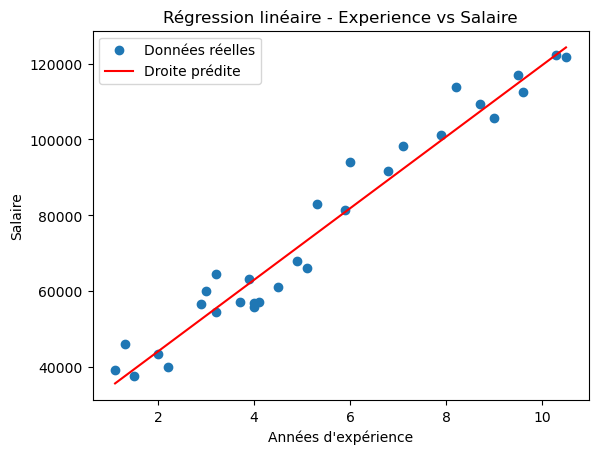

In [32]:
#Données réelles 
plt.scatter(X1, y1, label="Données réelles")

# Ligne de régression
plt.plot(X1, model1.predict(X1), color="red", label="Droite prédite")

plt.xlabel("Années d'expérience")
plt.ylabel("Salaire")
plt.title("Régression linéaire - Experience vs Salaire")
plt.legend()
plt.show()

### 4.   Évaluer le modèle en utilisant ces trois méthodes :

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(y1_test, y1_pred)

print("MSE  :", mse1)
print("RMSE :", rmse1)
print("MAE  :", mae1)

MSE  : 49830096.85590839
RMSE : 7059.04362190151
MAE  : 6286.453830757749


### 5. interpretaion du reuslat des mae, mse, rmse 

**Veuillez consulter le rapport de l’atelier…**

##  partie 3 « Régression multiple cas d’assurance »: 

### 1. Appliquer les techniques EDA puis donner des conclusions sur les données.

In [34]:
print("\nRésumé statistique :")
print(df3.describe())

print("\ndimensions :")
print(df3.shape)

print("\nTypes des colones :")
print(df3.info())

print("\nvaleurs manquantes :")
print(df3.isnull().sum())

print("\nlignes dupliquées :")
print(df3.duplicated().sum())



Résumé statistique :
               age          sex          bmi     children       smoker  \
count  1337.000000  1337.000000  1337.000000  1337.000000  1337.000000   
mean     39.222139     0.504862    30.663452     1.095737     0.204936   
std      14.044333     0.500163     6.100468     1.205571     0.403806   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.290000     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.700000     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1337.000000   1337.000000  
mean      1.516081  13279.121487  
std       1.105208  12110.359656  
min       0.000000   1121.873900  
25%       1.000000   4746.344000  
50%       2.000000   9386.161300  
75%       2.000000  16657.717450  
max       3.000000  63770.42801

### 2. Appliquer des techniques pour sélectionner 3 propriétés selon leurs dégrée d’importance justifier le choix.


#### Technique 1 — Matrice de corrélation (Heatmap)

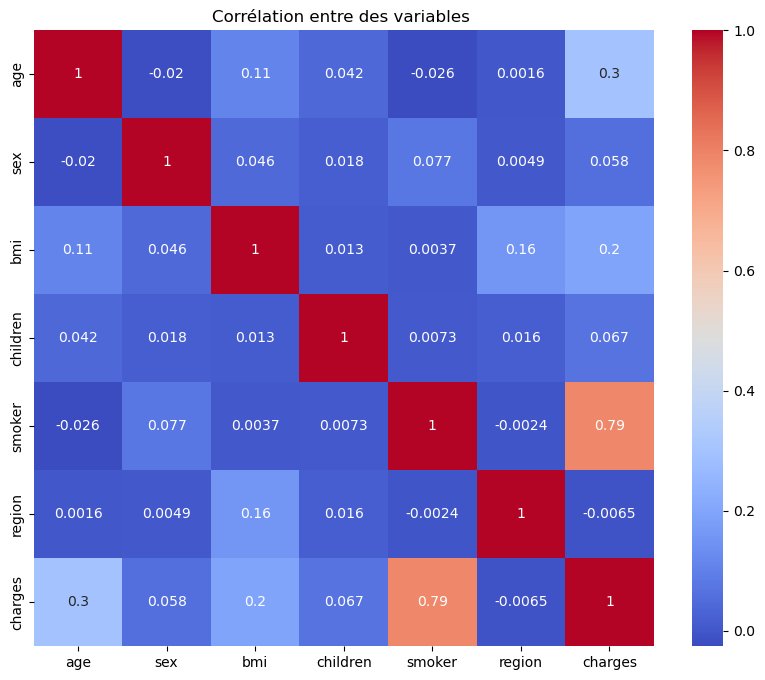

In [35]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre des variables ")
plt.show()


Corrélation:
charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64


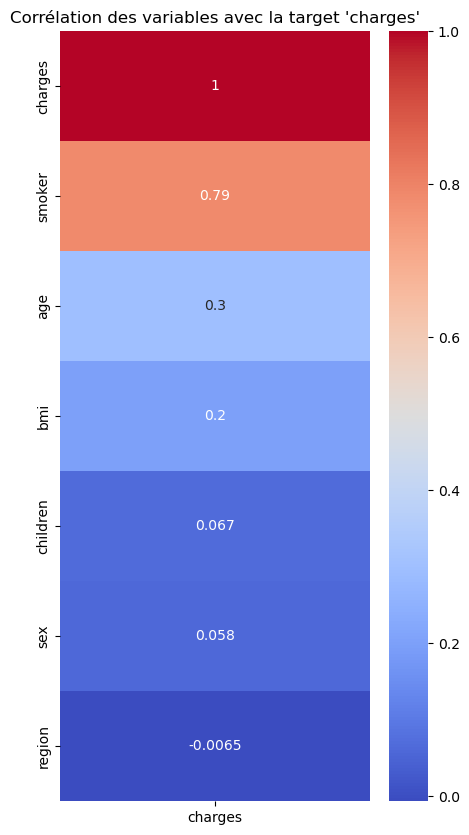

In [36]:
import seaborn as sns

corr_charges = df3.corr()['charges'].sort_values(ascending=False)

print("Corrélation:")
print(corr_charges)

# Heatmap de 'charges' 
plt.figure(figsize=(5,10))
sns.heatmap(corr_charges.to_frame(),  
            annot=True,
            cmap="coolwarm")
plt.title("Corrélation des variables avec la target 'charges'")
plt.show()

#### Technique 2 — Importance des features (RandomForestRegressor)

In [37]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(df3[['age','sex','bmi','children','smoker', 'region']], df3['charges'])

importances = model_rf.feature_importances_
print("Importance des features")
for f, imp in zip(['age','sex','bmi','children','smoker', 'region'], importances):
    print(f"{f} : {imp}")

Importance des features
age : 0.12902456531000306
sex : 0.006241282088036941
bmi : 0.21040542942281218
children : 0.019082698016750638
smoker : 0.6222968485894254
region : 0.012949176572971783


#### Technique 3 — Interprétation logique

On peut justifier avec la logique du domaine de l’assurance.

 Les fumeurs ont un risque médical plus élevé → coût d’assurance plus élevé.

 BMI élevé = obésité = maladies cardiovasculaires → coût plus élevé.

 Age : plus une personne est âgée, plus le risque de maladie augmente.

  Donc les 3 features les plus pertinentes sont :  age, bmi, smoker

### 3. Appliquer des technique de standardisation ou bien de normalisation sur les  propriétés choisit, justifier le choix.


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X3 = df3[['age', 'bmi', 'smoker']]
y3 = df3['charges']

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, random_state=42
)

# On ne standardise  age & bmi
X3_train_scaled = X3_train.copy()
X3_test_scaled = X3_test.copy()

X3_train_scaled[['age', 'bmi']] = scaler.fit_transform(X3_train[['age', 'bmi']])
X3_test_scaled[['age', 'bmi']] = scaler.transform(X3_test[['age', 'bmi']])

### 4. en utilisant l’API sklearn entraîner le modèle par intermédiaire de algorithme de la régression linière.


In [39]:
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X3_train_scaled, y3_train)

print("\nCoefficients du modèle :")
for feature, coef in zip(['age','bmi','smoker'], model3.coef_):
    print(f"{feature} : {coef}")

print("Intercept :", model3.intercept_)


Coefficients du modèle :
age : 3524.2627929030305
bmi : 1843.7537629767808
smoker : 23074.261734978376
Intercept : 8411.034041613308


### 5. prédire les données d’un data set de test.


In [40]:
y_pred3 = model3.predict(X3_test_scaled)

### 6. Visualiser le résultat de la régression sous forme d’un graphe.


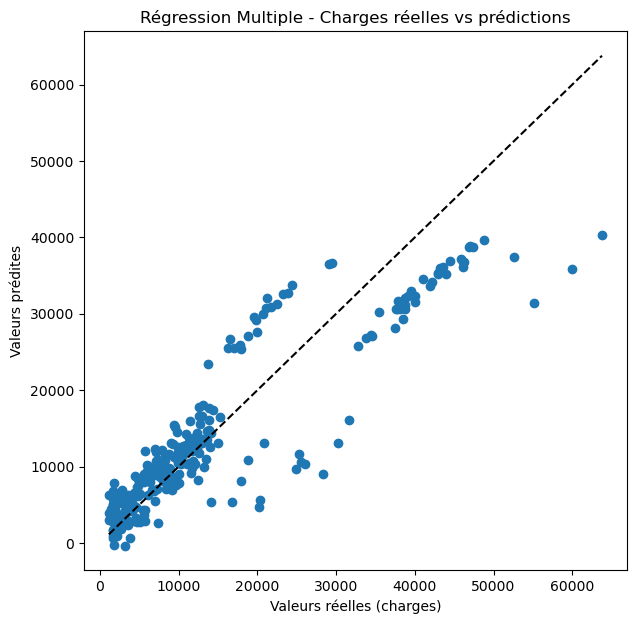

In [41]:
plt.figure(figsize=(7,7))
plt.scatter(y3_test, y_pred3)
plt.plot([y3_test.min(), y3_test.max()], [y3_test.min(), y3_test.max()], 'k--')
plt.xlabel("Valeurs réelles (charges)")
plt.ylabel("Valeurs prédites")
plt.title("Régression Multiple - Charges réelles vs prédictions")
plt.show()

###  7.   Évaluer le modèle en utilisant les trois méthodes :

In [42]:
mse = mean_squared_error(y3_test, y_pred3)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y3_test, y_pred3)

print("\nÉvaluation du modèle :")
print("MSE  :", mse)
print("RMSE :", rmse)
print("MAE  :", mae)


Évaluation du modèle :
MSE  : 35841574.8181475
RMSE : 5986.783344847841
MAE  : 4191.704294603891


## partie 4 « Régression linière polynomial multiple cas de china GDP»:

### 1. en utilisant l’API sklearn entraîner le modèle par intermédiaire de algorithme de la régression linière et puis la régression linière polynomiale .

In [43]:
df2 = pd.read_csv(r'C:\Users\imk\Desktop\LSI\Maching learning\data sets\china_gdp.csv')

print("df2 : years & salary dataset")
print("Aperçu des premières lignes :")
print(df2.head(), "\n")

print("Informations générales :")
print(df2.info(), "\n")

print(f"Nombre de lignes et colonnes : {df2.shape}")
print(f"Noms des colonnes : {df2.columns.tolist()}")
print("données statistiques ")
print(df2.describe())

print("=== Validation de la propreté du dataset ===")
df2 = df2.drop_duplicates()
# Vérification des doublons
nb_duplicats = df2.duplicated().sum()
print(f"Nombre de lignes dupliquées : {df2.duplicated().sum()}")

# Vérification des valeurs manquantes
print(f"\nValeurs manquantes par colonne :{df2.isnull().sum()}")

df2 : years & salary dataset
Aperçu des premières lignes :
   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10 

Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1012.0 bytes
None 

Nombre de lignes et colonnes : (55, 2)
Noms des colonnes : ['Year', 'Value']
données statistiques 
             Year         Value
count    55.00000  5.500000e+01
mean   1987.00000  1.437042e+12
std      16.02082  2.500085e+12
min    1960.00000  4.668518e+10
25%    1973.50000  1.395123e+11
50%    1987.00000  3.074796e+11
75%    2000.50000  1.268748e+12
max    2014.00000  1.035483e+13
=== Validation de la propreté du dataset ===
Nombre de lignes dupliquées : 0

Vale

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error


X2 = df2[['Year']]
y2 = df2['Value']

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

# Modèle  Linéaire simple
lin_model = LinearRegression()
lin_model.fit(X2_train, y2_train)

# model poly 
poly = PolynomialFeatures(degree=4)
X2_poly_train = poly.fit_transform(X2_train) 
X2_poly_test = poly.transform(X2_test)       

poly_model = LinearRegression()
poly_model.fit(X2_poly_train, y2_train)

LinearRegression()

### 2. prédire les données d’un data set de test pour les deux modèles .

In [45]:
# Prédiction du modèle linéaire
y2_pred_lin = lin_model.predict(X2_test)

# Prédiction du modèle polynomial
y2_pred_poly = poly_model.predict(X2_poly_test)

### 3. Visualiser le résultat de la régression sous forme d’un graphe des deux modèles.

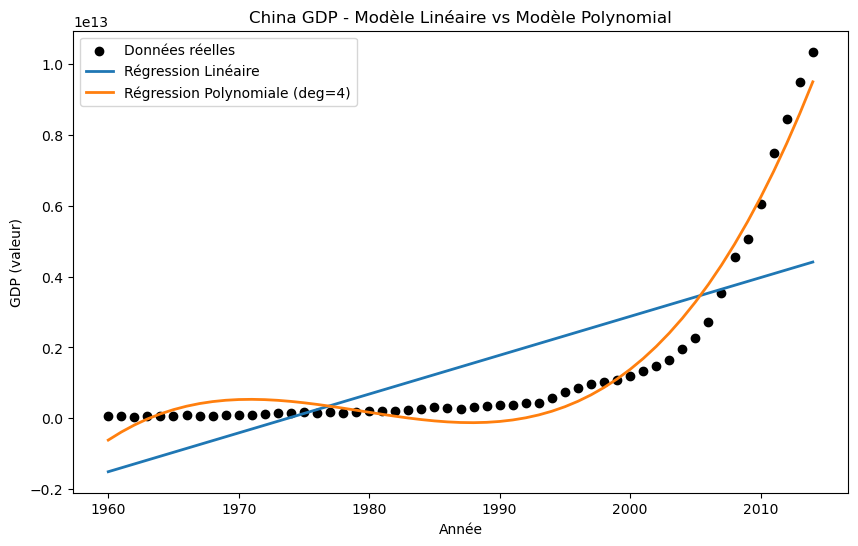

In [46]:
plt.figure(figsize=(10, 6))

#données réelles
plt.scatter(X2, y2, label="Données réelles", color='black')

# Courbe linéaire
X2_sorted = X2.sort_values(by='Year')
plt.plot(
    X2_sorted,
    lin_model.predict(X2_sorted),
    label="Régression Linéaire",
    linewidth=2
)

# Courbe polynomiale
plt.plot(
    X2_sorted,
    poly_model.predict(poly.transform(X2_sorted)),
    label="Régression Polynomiale (deg=4)",
    linewidth=2
)

plt.xlabel("Année")
plt.ylabel("GDP (valeur)")
plt.title("China GDP - Modèle Linéaire vs Modèle Polynomial")
plt.legend()
plt.show()

### 4. Évaluer les deux modèles en utilisant ces trois méthodes :

In [47]:
# Linéaire
mse_lin = mean_squared_error(y2_test, y2_pred_lin)
rmse_lin = np.sqrt(mse_lin)
mae_lin = mean_absolute_error(y2_test, y2_pred_lin)

# Polynomial
mse_poly = mean_squared_error(y2_test, y2_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y2_test, y2_pred_poly)

print("\n--- Modèle Linéaire ---")
print("MSE  :", mse_lin)
print("RMSE :", rmse_lin)
print("MAE  :", mae_lin)

print("\n--- Modèle Polynomial (degré 4) ---")
print("MSE  :", mse_poly)
print("RMSE :", rmse_poly)
print("MAE  :", mae_poly)


--- Modèle Linéaire ---
MSE  : 2.9097229920495426e+24
RMSE : 1705791016522.699
MAE  : 1341446144991.7834

--- Modèle Polynomial (degré 4) ---
MSE  : 2.0753412966070593e+23
RMSE : 455559139586.40533
MAE  : 413445599274.1387


### interpretaion 

**Veuillez consulter le rapport de l’atelier…**